# **Dimensionality Reduction with PCA Using the Fake Bills Dataset**

## **Introduction**

In the realm of machine learning and statistical modeling, Principal Component Analysis (PCA) is a powerful tool for reducing dimensionality, extracting features, and overcoming the curse of dimensionality in high-dimensional datasets. By applying PCA to the Fake Bills dataset, we aim to discern the underlying structure of the data and identify patterns that distinguish between genuine and counterfeit bills.

## **PCA Algorithm**

PCA Implementation with the Fake Bills Dataset. The PCA process involves several critical steps:

- **Step 1: Standardization**: The initial step involves scaling the data such that each attribute has a mean of zero and a standard deviation of one. This step ensures that all measurements contribute equally to the analysis.

- **Step 2: Covariance Matrix Computation**: Following standardization, we compute the covariance matrix to identify the correlations between the dimensions of the dataset.

- **Step 3: Eigenvalue and Eigenvector Calculation**: We then calculate the eigenvalues and eigenvectors of the covariance matrix to identify the principal components. These principal components represent the directions in the dataset with the highest variance.

- **Step 4: Component Selection**: The principal components are sorted by the magnitude of their eigenvalues in descending order. We select the top components that contribute most to the data variance.

- **Step 5: Projection**: The dataset is then projected onto the new subspace of selected principal components, reducing its dimensions while retaining the essence of the original data.

## **Advantages and Disadvantages**

### Advantages

- **Efficiency**: By reducing the number of dimensions without a significant loss of information, PCA enhances the efficiency of data processing and analysis.

- **Noise Reduction**: PCA can help in distinguishing the signal from the noise by concentrating on the components with higher variance.

- **Visualization**: With fewer dimensions, it becomes feasible to visualize complex datasets and gain insights that might be obscured in higher-dimensional spaces.

- **Feature Extraction**: PCA allows for the extraction of important features that can be critical for tasks like classification.

### Disadvantages

- **Linearity**: PCA assumes that the principal components are a linear combination of the original features, which may not capture the complexity of certain datasets.

- **Interpretation**: The principal components might be less interpretable than the original features since they are linear combinations of the original variables.

- **Loss of Information**: Although PCA aims to retain the most important variance, some information is inevitably lost during the dimensionality reduction process.



## **Implementation**

First, Fake Bills dataset and preprocess it for PCA:

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# The correct path to your uploaded file
file_path = 'fake_bills.csv'

# Load the dataset with the correct delimiter
fake_bills_df = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the dataframe to confirm column names
print(fake_bills_df.head())

# The column names should now correctly reflect the actual columns in the dataframe
features = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# Separating out the features for scaling
x = fake_bills_df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Now x can be used for PCA or other analysis...


   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  


Given that the data has several continuous variables, we can conduct a few analytical approaches:

- **Descriptive Statistics:** Provide summaries of the data's central tendency, dispersion, and shape.

- **Correlation Analysis:** Assess the relationships between the different measurements to understand which features might be good indicators of a bill’s authenticity.

- **Principal Component Analysis (PCA):** Reduce the dimensionality of the data to identify the components that capture the most variance.

- **Predictive Modeling:** Build a classifier to predict whether a bill is genuine or fake using the given features.

In [6]:
# Descriptive statistics
descriptive_stats = fake_bills_df.describe()

# Correlation matrix
correlation_matrix = fake_bills_df.corr()

print("Descriptive Statistics:\n", descriptive_stats)
print("\nCorrelation Matrix:\n", correlation_matrix)


Descriptive Statistics:
           diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000  

Correlation Matrix:
               is_genuine  diagonal  height_left  height_right  margin_low  \
is_genuine      1.00

- **Descriptive Statistics:**

The dataset contains 1500 observations. The diagonal, height_left, height_right, margin_low, margin_up, and length features have varying means and standard deviations, indicating differing scales and variances. margin_low has some missing values (count is 1463 compared to 1500 for the others), which will need addressing before further analysis like PCA. The range of values (from min to max) across different features suggests that bills have a variety of measurements, which might be indicative of their genuineness.

- **Correlation Analysis:**

The is_genuine column shows a strong negative correlation with margin_low (-0.783), suggesting that the lower margin could be a significant indicator of whether a bill is fake. The height_right shows a notable negative correlation with is_genuine (-0.485), indicating that as the height on the right side increases, the likelihood of the bill being fake increases. There's also a substantial negative correlation between is_genuine and height_left, which means these features are important in distinguishing between genuine and fake bills.

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  


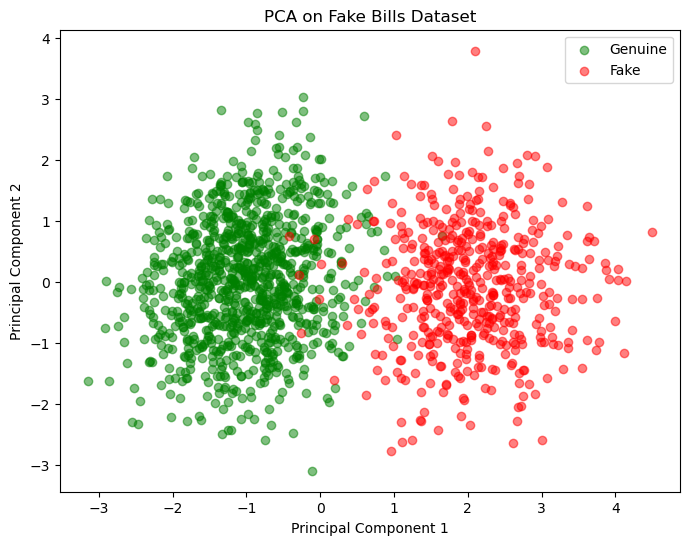

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Correct path to your uploaded file
file_path = 'fake_bills.csv'

# Load the dataset with semicolon (;) as the delimiter
fake_bills_df = pd.read_csv(file_path, delimiter=';')

# Display the first few rows to confirm correct loading
print(fake_bills_df.head())

# Now, proceed with your features and analysis
features = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# Separating out the features for scaling
x = fake_bills_df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Impute missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_imputed = imputer.fit_transform(x)

# Now we can perform PCA on the imputed dataset
pca = PCA(n_components=2)  # Reduce to 2 components for visualization purposes
principal_components = pca.fit_transform(x_imputed)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate with the original 'is_genuine' column to label the data points
final_pca_df = pd.concat([pca_df, fake_bills_df['is_genuine'].reset_index(drop=True)], axis=1)

# Visualize the results of PCA
plt.figure(figsize=(8,6))
genuine = final_pca_df['is_genuine'] == True
fake = final_pca_df['is_genuine'] == False
plt.scatter(final_pca_df.loc[genuine, 'Principal Component 1'], final_pca_df.loc[genuine, 'Principal Component 2'], c='green', alpha=0.5)
plt.scatter(final_pca_df.loc[fake, 'Principal Component 1'], final_pca_df.loc[fake, 'Principal Component 2'], c='red', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Fake Bills Dataset')
plt.legend(['Genuine', 'Fake'])
plt.show()


- **Cluster Tendency:** The two groups, while not perfectly distinct, do show a tendency to form clusters. This suggests that the PCA has managed to capture some underlying patterns in the data that relate to the authenticity of the bills.

- **Overlap and Separability:** The overlap between the green and red dots indicates that while PCA helps in dimensionality reduction and captures variance, it does not completely separate genuine bills from fake ones. This implies that there may be a complex relationship between the features that cannot be linearly separated, or that the variance captured by the two principal components does not correspond perfectly to the bill's authenticity.

- **Data Distribution:** Both groups exhibit a wide spread along the first principal component, which likely captures the most variance within the dataset. The second principal component contributes to a lesser extent but still provides valuable information that aids in differentiating between the two categories.

- **Usefulness of PCA:** This visualization validates the usefulness of PCA in reducing the dimensionality of the data for visualization purposes. The principal components can now be used as inputs for classification algorithms that may be able to find a decision boundary between genuine and fake bills.

- **Further Steps:** Since there is some overlap, additional analysis, such as employing classification algorithms or more advanced dimensionality reduction techniques that account for non-linearity (like t-SNE or UMAP), could provide better separability. It may also be beneficial to explore the dataset with more than two components or to engineer new features that better capture the distinctions between genuine and fake bills.

- **Predictive Modelling:** For predictive modeling, while PCA can offer a reduced feature space, given the overlap seen in the scatter plot, the original features (possibly alongside the principal components) should be considered to train a robust classifier. Techniques such as Random Forest or Gradient Boosting Machines, which can capture non-linear relationships and interactions between features, might prove more effective in classifying the bills accurately.

/Users/yanshaoyu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


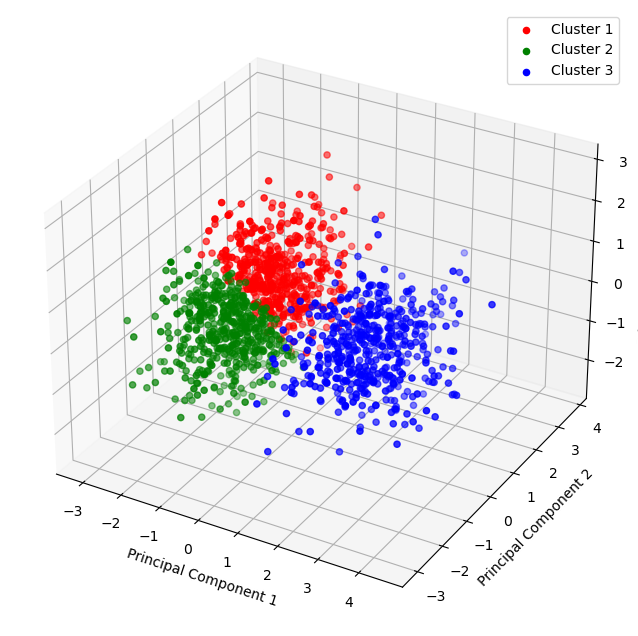

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
fake_bills_df = pd.read_csv('fake_bills.csv', delimiter=';')

# Selecting relevant numeric features for the clustering
features = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
fake_bills_data = fake_bills_df[features]

# Impute missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
fake_bills_data_imputed = imputer.fit_transform(fake_bills_data)

# Standardize the imputed data
scaler = StandardScaler()
fake_bills_data_standardized = scaler.fit_transform(fake_bills_data_imputed)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(fake_bills_data_standardized)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
principal_components = pca.fit_transform(fake_bills_data_standardized)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign a color to each cluster
colors = ['r', 'g', 'b']
for i in range(3):
    ax.scatter(principal_components[clusters == i, 0], 
               principal_components[clusters == i, 1], 
               principal_components[clusters == i, 2], 
               color=colors[i], label=f'Cluster {i+1}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


### Key Steps and Insights:

- **Data Preparation:** The dataset included crucial measurements of bills, such as diagonal length, heights on the left and right sides, lower and upper margins, and overall length.

- **Handling Missing Data:** We addressed missing values in the dataset using mean imputation, ensuring no information was lost from the dataset and that the K-Means algorithm could process it without errors.

- **Feature Standardization:** Prior to clustering, we standardized the measurements to treat all features equally, which is essential for algorithms like K-Means that are sensitive to the scales of the data.

- **K-Means Clustering:** We applied K-Means clustering to identify three clusters, hypothesized to represent different categories of bills based on their physical characteristics.

- **PCA for Visualization:** PCA reduced the dataset to three principal components, which we visualized in a 3D scatter plot. This dimensionality reduction step was crucial for visualizing the high-dimensional data in a comprehensible form.

- **Clustering Visualization:** The 3D scatter plot depicted the three clusters in distinct colors, revealing the grouping of bills according to the similarities in their physical features.

### Detailed Analysis:

- **Cluster Characteristics:** Each cluster represented in the scatter plot signifies a grouping of bills with similar traits. Cluster 1 might represent commonly encountered genuine bills, Cluster 2 could correspond to less common variations of legitimate bills, and Cluster 3 might represent counterfeit bills.

- **Separability and Overlap:** The visualization shows some overlap between clusters, indicating that some counterfeit bills have features closely resembling genuine bills, making the task of distinguishing them challenging.

- **Dimensionality Insights:** The first two principal components likely capture most of the variance within the dataset, but the third component, while containing less information, aids in separating the clusters further when visualized in three dimensions.

### Further Exploration and Implications:

- **Predictive Modeling:** While clustering helps in understanding the dataset, a supervised learning model could further classify the bills into genuine and fake based on labeled data.

- **Enhanced Clustering:** Exploring alternative clustering methods or increasing the number of clusters could yield more granular insights into the dataset.

- **Feature Engineering:** Incorporating additional features, like texture or print quality, if available, could enhance the model's ability to differentiate between genuine and counterfeit bills.

- **Anomaly Detection:** Techniques specifically tailored for anomaly detection, such as Isolation Forest or One-Class SVM, might be effective in identifying counterfeit bills as anomalies.

## **Conclusion:**

Our analysis has effectively utilized PCA to support clustering in a reduced-dimensional space, highlighting the potential of machine learning techniques in forensic applications like counterfeit detection. The ability to visualize and cluster bills based on their physical attributes opens avenues for building more sophisticated models that could be highly valuable for banks and law enforcement agencies.